<h3 style="text-align: center;">ESCUELA TÉCNICA SUPERIOR DE INGENIERÍA INFORMÁTICA</h3>
<h3 style="text-align: center;">UNIVERSIDAD DE SEVILLA</h3>
<h3 style="text-align: center;">MATEMÁTICA APLICADA A SISTEMAS DE INFORMACIÓN</h3>
<h3 style="text-align: center;">Quinta práctica de laboratorio</h3>
<p>En esta práctica estudiaremos métodos de optimización cuando consideramos más de un objetivo, la optimizacion multiobjetivo. Es decir partimos del problema:</p>
<p>$$\begin{array}{rl}\max & f_1,f_2,\ldots,f_n\\s.t.&Ax=b\end{array}$$</p>
<p>Comenzaremos con un problema con dos objetivos y dos variables:</p>
<p>$$\begin{array}{rl}\max & f_1(x,y)=4x+3y, \;  f_2(x,y)=-3x-2y\\s.t.&x+y\leq 5\\&2x+y\leq8\\&x\geq1\\&x,y\geq0\end{array}$$</p>
<p>Si estamos interesados en calcular la matriz de pagos, fijamos el primer objetivo y resolvemos el problema:</p>

In [1]:
p=MixedIntegerLinearProgram()

In [2]:
x=p.new_variable(nonnegative=True)

In [3]:
p.add_constraint(x[1] + x[2] <= 5)
p.add_constraint(2*x[1]+x[2]<=8)
p.add_constraint(x[1]>=1)

In [4]:
p.set_objective(4*x[1]+3*x[2])

In [6]:
p.solve()

18.0

In [7]:
p.get_values(x)

{1: 3.0, 2: 2.0}

<p>Así la solución para el primer objetivo es $\mathbf{x_1^*}=(3,2)$, y puesto que $f_1(\mathbf{x_1^*})=18$ tenemos el primer elemento de la matriz de pagos, si queremos calcular la primera fila completa necesitamos calcular $f_2(\mathbf{x_1^*})$:</p>

In [8]:
f2(x,y)=-3*x-2*y

In [9]:
f2(3,2)

-13

<p>Así la primera fila de la matriz de pagos es $(18,-13)$.</p>
<h2>Método de las ponderaciones</h2>
<p>Si en nuestro método estamos interesados en utilizar el método de las ponderaciones, se trata de resolver</p>
<p>$$\begin{array}{rl}\max & Z_w=w_1 f_1+\ldots+w_n f_n\\s.t.&Ax=b\end{array} \quad \mbox{ tal que }  \; w_i \ge 0, \; \; \sum_i w_i=1$$</p>
<p>En nuestro caso podemos considerar:</p>
<p>$$\begin{array}{rl}\max & Z_w(x,y)= w(4x+3y)+(1-w)(-3x-2y)\\s.t.&x+y\leq 5\\&2x+y\leq8\\&x\geq1\\&x,y\geq0\end{array}$$</p>
<p>Tomemos un total de 6 ponderaciones con $w=0,0.2,0.4,\ldots, 1$</p>

In [10]:
for i in range(6):
    p=MixedIntegerLinearProgram()
    x=p.new_variable(nonnegative=True)
    p.add_constraint(x[1] + x[2] <= 5)
    p.add_constraint(2*x[1]+x[2]<=8)
    p.add_constraint(x[1]>=1)
    p.set_objective(i/5*(4*x[1]+3*x[2])+(1-i/5)*(-3*x[1]-2*x[2]))
    print ("i=",i,  ";  Valor Objetivo=", p.solve(), ";  Soluciones=", p.get_values(x) )

i= 0 ;  Valor Objetivo= -3.0 ;  Soluciones= {1: 1.0, 2: 0.0}
i= 1 ;  Valor Objetivo= -1.6000000000000003 ;  Soluciones= {1: 1.0, 2: 0.0}
i= 2 ;  Valor Objetivo= -0.19999999999999973 ;  Soluciones= {1: 1.0, 2: 0.0}
i= 3 ;  Valor Objetivo= 5.599999999999999 ;  Soluciones= {1: 3.0, 2: 2.0}
i= 4 ;  Valor Objetivo= 11.8 ;  Soluciones= {1: 3.0, 2: 2.0}
i= 5 ;  Valor Objetivo= 18.0 ;  Soluciones= {1: 3.0, 2: 2.0}


<p>Obtenemos los puntos factibles: $\{(1,0),(1,4),(3,2)\}$.</p>
<p>Puesto que tenemos una región factible en el plano podemos dibujar las restricciones.</p>

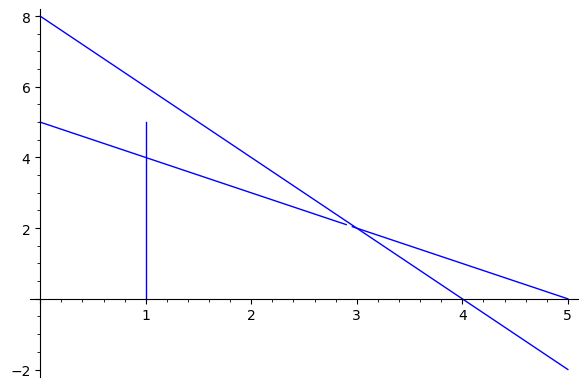

In [11]:
l1(x)=5-x
l2(x)=8-2*x
dibu=plot(l1(x),0,5)+plot(l2(x),0,5)
dibu=dibu+line([(1,0),(1,5)])
show(dibu)

<p>Si añadimos al dibujo los puntos factibles óptimos de algún problema ponderado.</p>

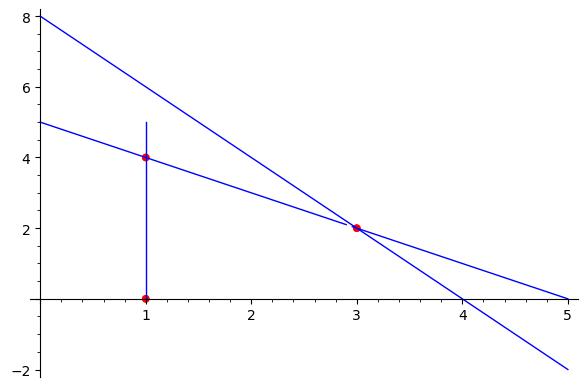

In [14]:
dibu=dibu+point((1,0),color='red',size=30)+point((1,4),color='red',size=30)+point((3,2),color='red',size=30)
show(dibu)

<p>Si estamos interesados en el espacio de objetivos, podemos dibujar la imagen de cada uno de los puntos obtenidos mediante el método de las ponderaciones.</p>

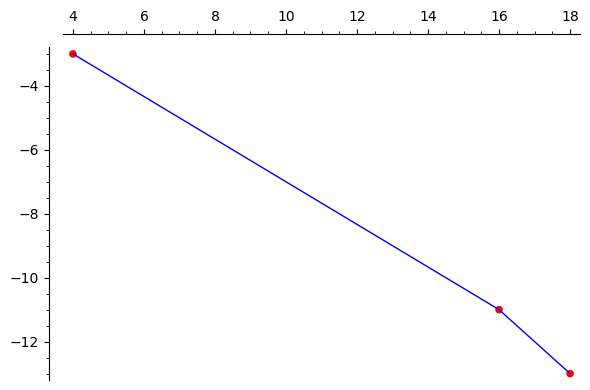

In [15]:
f1(x,y)=4*x+3*y
p1=(f1(1,0),f2(1,0))
p2=(f1(1,4),f2(1,4))
p3=(f1(3,2),f2(3,2))
dibuObje=line([p1,p2,p3])+point(p1,color='red',size=30)+point(p2,color='red',size=30)+point(p3,color='red',size=30)
show(dibuObje)

<p>También podemos introducir los datos para construir el vector de ponderaciones  como queramos. Por ejemplo, para dos objetivos $f_1$, $f_2$, si $w > 1$,  la combinación de ponderaciones sería $Z_w= \displaystyle  \frac{1}{w} f_1 + (1-\displaystyle \frac{1}{w}) f_2$.  Recordemos además que si la región factible es no acotada, podemos obtener problemas no acotados.</p>

In [16]:
w=(0.1,0.2, 0.4, 0.7, 1, 2, 5)
lista_puntos=[]
p=MixedIntegerLinearProgram()
x=p.new_variable(nonnegative=True)
p.add_constraint(x[1] + x[2] <= 5)
p.add_constraint(2*x[1]+x[2]<=8)
p.add_constraint(x[1]>=1)
for i in range(len(w)):
    if w[i]<=1:
        p.set_objective(w[i]*(4*x[1]+3*x[2])+(1-w[i])*(-3*x[1]-2*x[2]))
    else:
        p.set_objective(1/w[i]*(4*x[1]+3*x[2])+(1-1/w[i])*(-3*x[1]-2*x[2]))    
    print ("w=",w[i])
    print ("Objective value=", p.solve())
    Point=p.get_values(x);
    lista_puntos.append([Point[1], Point[2]])
    print ("Point =", p.get_values(x))
print ("lista_puntos =", lista_puntos)

w= 0.100000000000000
Objective value= -2.3000000000000003
Point = {1: 1.0, 2: 0.0}
w= 0.200000000000000
Objective value= -1.6000000000000003
Point = {1: 1.0, 2: 0.0}
w= 0.400000000000000
Objective value= -0.19999999999999973
Point = {1: 1.0, 2: 0.0}
w= 0.700000000000000
Objective value= 8.7
Point = {1: 3.0, 2: 2.0}
w= 1
Objective value= 18.0
Point = {1: 3.0, 2: 2.0}
w= 2
Objective value= 2.5
Point = {1: 3.0, 2: 2.0}
w= 5
Objective value= -1.6000000000000003
Point = {1: 1.0, 2: 0.0}
lista_puntos = [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [3.0, 2.0], [3.0, 2.0], [3.0, 2.0], [1.0, 0.0]]


lista_imagenes= [(4.0, -3.0), (4.0, -3.0), (4.0, -3.0), (18.0, -13.0), (18.0, -13.0), (18.0, -13.0), (4.0, -3.0)]


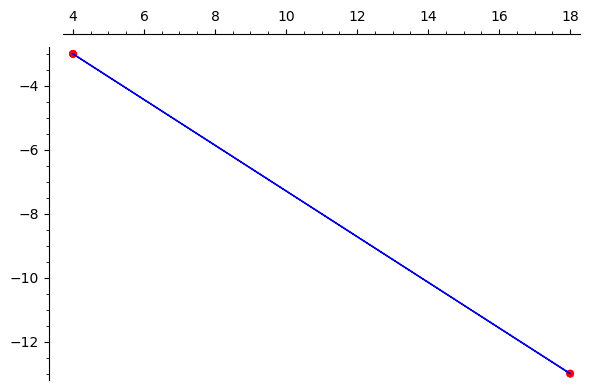

In [17]:
f1(x,y)=4*x+3*y
f2(x,y)=-3*x-2*y
lista_imagenes=[]
for i in range(len(lista_puntos)):
    lista_imagenes.append((f1(lista_puntos[i][0], lista_puntos[i][1]), f2(lista_puntos[i][0], lista_puntos[i][1])))
print ("lista_imagenes=", lista_imagenes)  
dibuObje=line(lista_imagenes)+point(lista_imagenes,color='red',size=30)
show(dibuObje)

In [1]:
NUMERO_ALUMNO = 16

NOMBRE_FICHERO_EXAMEN = 'L5_MASI_t.htl'
load('codigo_examinar_html.sage')

if NUMERO_ALUMNO > 0:
    lector_examenes(NOMBRE_FICHERO_EXAMEN,NUMERO_ALUMNO,False)


"1. (50, 33)","2. (39, 49)"
"3. (37, 46)",4. Ninguna de las otras respuestas.
"1. [68, 14]","2. [41, 23]"
"3. [51, 22]",4. Ninguna de las otras respuestas.
1. 85.6000000000000,2. 2.40000000000000
3. 1.20000000000000,4. Ninguna de las otras respuestas.
"1. [10, 8, 4]","2. [15, 3, 3]"
"3. [11, 8, 12]",4. Ninguna de las otras respuestas.


In [ ]:
# EJERCICIO 1
'''
Se considera el problema biobjetivo consistente en maximizar las funciones  x+5∗y  y  5∗x−y  sujetas al conjunto 
de restricciones
'''

In [ ]:
# EJERCICIO 1 - APARTADO 1
'''
El punto ideal es:
'''

In [21]:
p=MixedIntegerLinearProgram()
x=p.new_variable(nonnegative=True)

p.add_constraint(3 * x[1] - 6 * x[2] >= -42)
p.add_constraint(-5 * x[1] - 5 * x[2] >= -80)
p.add_constraint(-5 * x[1] + 2 * x[2] >= -45)

# Aparecen 2, las pruebo una a una:
#p.set_objective(1 * x[1] + 5 * x[2])
p.set_objective(5 * x[1] - 1 * x[2])

# Resolver: apuntar los dos valores que salgan:
p.solve()

# Salen 50.0 y 56.0 que no coinciden con las respuestas. 

50.0

In [ ]:
'''
1. (50, 33)	2. (39, 49)
3. (37, 46)	4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 1 - APARTADO 2 
'''
La primera fila de la matriz de pago es:
'''

In [12]:
# De la primera función objetivo:
p.get_values(x)

{1: 6.0, 2: 10.0}

In [13]:
# La segunda función objetivo:
f2(x,y)= 5 * x - 1 * y

# El valor de arriba y el que salga aquí son solución:
f2(6.0, 10.0)

# Salen 20.0 que no coincide con las respuestas. 

20.0000000000000

In [ ]:
'''
1. [68, 14]	2. [41, 23]
3. [51, 22]	4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 1 - APARTADO 3
'''
Si se usa el metodo de las ponderaciones con  w=0.2∗i  con  i=0,…,5 , el conjunto de soluciones diferentes que
se obtienen en el espacio de Decisiones es:
'''

In [14]:
# Cambiar el bucle por el valor dado en i y TODAS las constraints por las dadas y las funciones objetivo:
for i in range(5):
    p=MixedIntegerLinearProgram()
    x=p.new_variable(nonnegative=True)
    # Cambiar los constraints:
    p.add_constraint(3 * x[1] - 6 * x[2] >= -42)
    p.add_constraint(-5 * x[1] - 5 * x[2] >= -80)
    p.add_constraint(-5 * x[1] + 2 * x[2] >= -45)
    # 1 entre 5 es 0.2 --> si dan otro w, cambiar lo que divide a i para que de w:
    # Cambiar las funciones objetivo:
    p.set_objective(i/5*(1 * x[1] + 5 * x[2])+(1-i/5)*(5 * x[1] - 1 * x[2]))
    print("i=",i,  ";  Valor Objetivo=", p.solve(), ";  Soluciones=", p.get_values(x))
    
    # las que se repiten no pueden ser soluciones:

i= 0 ;  Valor Objetivo= 50.0 ;  Soluciones= {1: 11.0, 2: 5.0}
i= 1 ;  Valor Objetivo= 47.2 ;  Soluciones= {1: 11.0, 2: 5.0}
i= 2 ;  Valor Objetivo= 44.4 ;  Soluciones= {1: 11.0, 2: 5.0}
i= 3 ;  Valor Objetivo= 41.6 ;  Soluciones= {1: 11.0, 2: 5.0}
i= 4 ;  Valor Objetivo= 48.8 ;  Soluciones= {1: 6.0, 2: 10.0}


In [ ]:
'''
1. ((11.0, 5.0),)
2. ((6.0, 10.0), (11.0, 5.0))
3. ((7.000000000000001, 6.0), (10.0, 4.0))
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 1 - APARTADO 4
'''
Los vertices de la frontera del conjunto factible en el espacio de Objetivos y los que provienen del metodo de
las ponderaciones del apartado anterior son:
'''

In [15]:
w=(0.2,0.4,0.6,0.8,1)
lista_puntos=[]
p=MixedIntegerLinearProgram()
x=p.new_variable(nonnegative=True)
p.add_constraint(3 * x[1] - 6 * x[2] >= -42)
p.add_constraint(-5 * x[1] - 5 * x[2] >= -80)
p.add_constraint(-5 * x[1] + 2 * x[2] >= -45)
for i in range(len(w)):
    if w[i]<=1:
        p.set_objective(w[i]*(1 * x[1] + 5 * x[2])+(1-w[i])*(5 * x[1] - 1 * x[2]))
    else:
        p.set_objective(1/w[i]*(1 * x[1] + 5 * x[2])+(1-1/w[i])*(5 * x[1] - 1 * x[2]))    
    print ("w=",w[i])
    print ("Objective value=", p.solve())
    Point=p.get_values(x);
    lista_puntos.append([Point[1], Point[2]])
    print ("Point =", p.get_values(x))
print ("lista_puntos =", lista_puntos)

w= 0.200000000000000
Objective value= 47.2
Point = {1: 11.0, 2: 5.0}
w= 0.400000000000000
Objective value= 44.4
Point = {1: 11.0, 2: 5.0}
w= 0.600000000000000
Objective value= 41.6
Point = {1: 11.0, 2: 5.0}
w= 0.800000000000000
Objective value= 48.8
Point = {1: 6.0, 2: 10.0}
w= 1
Objective value= 56.0
Point = {1: 6.0, 2: 10.0}
lista_puntos = [[11.0, 5.0], [11.0, 5.0], [11.0, 5.0], [6.0, 10.0], [6.0, 10.0]]


In [ ]:
'''
1. [[[0, 0], [16, -12], [48, 3], [30, 36], [12, 30]], [[48, 3], [30, 36]]]
2. [[[0, 0], [30, -6], [80, 30], [51, 45], [3, 4]], [[80, 30], [51, 45]]]
3. [[[0, 0], [35, -7], [56, 20], [36, 50], [9, 45]], [[56, 20], [36, 50]]]
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 1 - APARTADO 5
'''
¿Se obtiene la frontera de Pareto completa?
'''

In [ ]:
'''
1. Se obtiene una parte (incompleta) de la frontera de pareto, consistente en 3 segmentos
2. Se obtiene la frontera completa de pareto, consistente en 0 segmentos
3. Se obtiene una parte (incompleta) de la frontera de pareto, consistente en 0 segmentos
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2
'''
Se considera el problema biobjetivo consistente en maximizar las funciones  3∗x+3∗y+z  y  −x+y−4∗z  sujetas al 
conjunto de restricciones
'''

In [ ]:
# EJERCICIO 2 - APARTADO 1
'''
Si consideramos que la función objetivo tiene una importancia del  40  por ciento para  f1  y el resto para  f2 ,
marcar el valor del optimo encontrado.
'''

In [17]:
p=MixedIntegerLinearProgram()
x=p.new_variable(nonnegative=True)

p.add_constraint(2 * x[1] - 20 * x[2] + 46 * x[3] >= 78)
p.add_constraint(44 * x[1] - 14 * x[2] + 18 * x[3] <= 580)
p.add_constraint(24 * x[1] + 44 * x[2] - 16 * x[3] >= 368)
p.add_constraint(-18 * x[1] + 38 * x[2] + 12 * x[3] <= 150)

# O.4 es el 40% por cierto y el 0.6 es el resto: 1 - 0.4:
p.set_objective(0.4*(3 * x[1] + 3 * x[2] + 1 * x[3])+0.6*(-1 * x[1] + 1 * x[2] - 4 * x[3]))

# El valor objetivo es la solucion:
print ("Importancia: ", 0.4,  ";  Valor Objetivo=", p.solve(), ";  Soluciones=", p.get_values(x) )

# Sale 14.6 que no corresponde a ninguna solución

Importancia:  0.400000000000000 ;  Valor Objetivo= 14.600000000000001 ;  Soluciones= {1: 14.0, 2: 8.999999999999998, 3: 5.0}


In [ ]:
'''
1. 85.6000000000000	2. 2.40000000000000
3. 1.20000000000000	4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 2
'''
Si consideramos que la función objetivo tiene una importancia del  60  por ciento para  f1  y el resto para  f2 ,
marcar el punto donde se alcanza el optimo encontrado
'''

In [18]:
p=MixedIntegerLinearProgram()
x=p.new_variable(nonnegative=True)

p.add_constraint(2 * x[1] - 20 * x[2] + 46 * x[3] >= 78)
p.add_constraint(44 * x[1] - 14 * x[2] + 18 * x[3] <= 580)
p.add_constraint(24 * x[1] + 44 * x[2] - 16 * x[3] >= 368)
p.add_constraint(-18 * x[1] + 38 * x[2] + 12 * x[3] <= 150)

# O.6 es el 60% por cierto y el 0.4 es el resto: 1 - 0.6:
p.set_objective(0.6*(3 * x[1] + 3 * x[2] + 1 * x[3])+0.4*(-1 * x[1] + 1 * x[2] - 4 * x[3]))

# Mirar el conjunto de soluciones:
print ("Importancia: ", 0.6,  ";  Valor Objetivo=", p.solve(), ";  Soluciones=", p.get_values(x) )

# Sale {14.0, 8.9, 5.0} que no corresponde a ninguna solución

Importancia:  0.600000000000000 ;  Valor Objetivo= 34.39999999999999 ;  Soluciones= {1: 14.0, 2: 8.999999999999998, 3: 5.0}


In [ ]:
'''
1. [10, 8, 4]	2. [15, 3, 3]
3. [11, 8, 12]	4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 3
'''
Si el intervalo de valores de la matriz de pagos en su primera columna es  [fmin,fmax] , y consideramos el metodo de
las  ϵ -restricciones dividiendo dicho intervalo en 10 partes, al resolver las 11  ϵ -restricciones, se obtiene la 
siguiente lista de puntos en el espacio de objetivos
'''

In [ ]:
'''
1. [(-40.0, 46.0)]
2. [(59.0, -80.0)]
3. [(81.0, -97.0)]
4. Ninguna de las otras respuestas.
'''

In [ ]:
# EJERCICIO 2 - APARTADO 4
'''
Si el intervalo de valores de la matriz de pagos en su segunda columna es  [fmin,fmax] , y consideramos el metodo de las 
ϵ -restricciones dividiendo dicho intervalo en 10 partes, al resolver las 11  ϵ -restricciones, se obtiene la siguiente
lista de puntos en el espacio de objetivos
'''

In [ ]:
'''
1. [(76.0, 90.0)]
2. [(26.0, -36.0)]
3. [(79.0, 90.0)]
4. Ninguna de las otras respuestas.
'''

In [ ]:
# FIN